## 点云转range（point_cloud_to_range_image）

### 真实点云

(303104, 3)


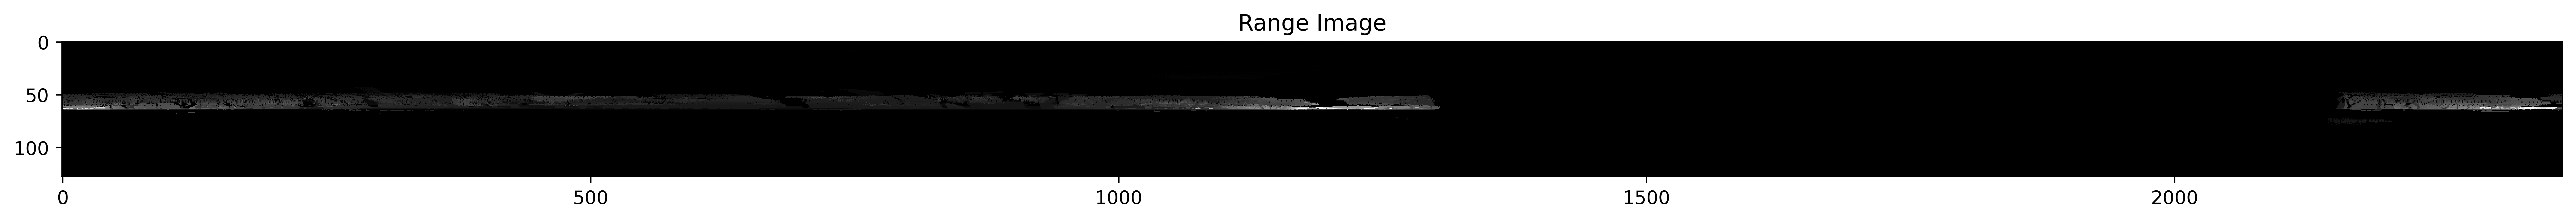

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def point_cloud_to_range_image(points, width, height):
    range_image = np.zeros((height, width))
    
    for point in points:
        x, y, z = point
        r = np.sqrt(x**2 + y**2 + z**2)
        theta = np.arctan2(y, x)
        phi = np.arccos(z / (r + 1e-6))
        
        # 将弧度转换为像素坐标
        u = int((theta + np.pi) / (2 * np.pi) * width)
        v = int((phi) / np.pi * height)
        
        if u >= 0 and u < width and v >= 0 and v < height:
            range_image[v, u] = r  # 用距离填充像素值
    
    return range_image

# 示例点云数据
range_image = np.load("./points.npy")  # 示例数据
range_image = range_image[::-1, :, :]
points = range_image.reshape(-1, 4)[:, :-1]
print(points.shape)
# points = np.array([[1, 2, 0.5], [2, 3, 1], [1, 1, 0.2]])

# 转换为 Range Image
width, height = 2368, 128
range_image = point_cloud_to_range_image(points, width, height)

# 显示 Range Image
plt.figure(figsize=(24, 16), dpi=500)
plt.imshow(range_image, cmap='gray')
# plt.imshow(range_image, cmap='Blues')
# plt.colorbar()
plt.title('Range Image')
plt.show()

### 测试点云

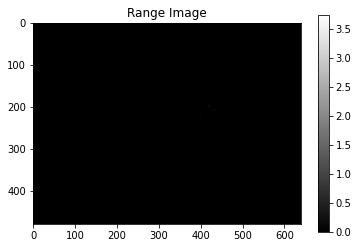

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def point_cloud_to_range_image(points, width, height):
    range_image = np.zeros((height, width))
    
    for point in points:
        x, y, z = point
        r = np.sqrt(x**2 + y**2 + z**2)
        theta = np.arctan2(y, x)
        phi = np.arccos(z / r)
        
        # 将弧度转换为像素坐标
        u = int((theta + np.pi) / (2 * np.pi) * width)
        v = int((phi) / np.pi * height)
        
        if u >= 0 and u < width and v >= 0 and v < height:
            range_image[v, u] = r  # 用距离填充像素值
    
    return range_image

# 示例点云数据
points = np.array([[1, 2, 0.5], [2, 3, 1], [1, 1, 0.2]])

# 转换为 Range Image
width, height = 640, 480
range_image = point_cloud_to_range_image(points, width, height)

# 显示 Range Image
plt.imshow(range_image, cmap='gray')
plt.colorbar()
plt.title('Range Image')
plt.show()


## 可视化range_image(128, 2368, 4)

(128, 2368, 4)


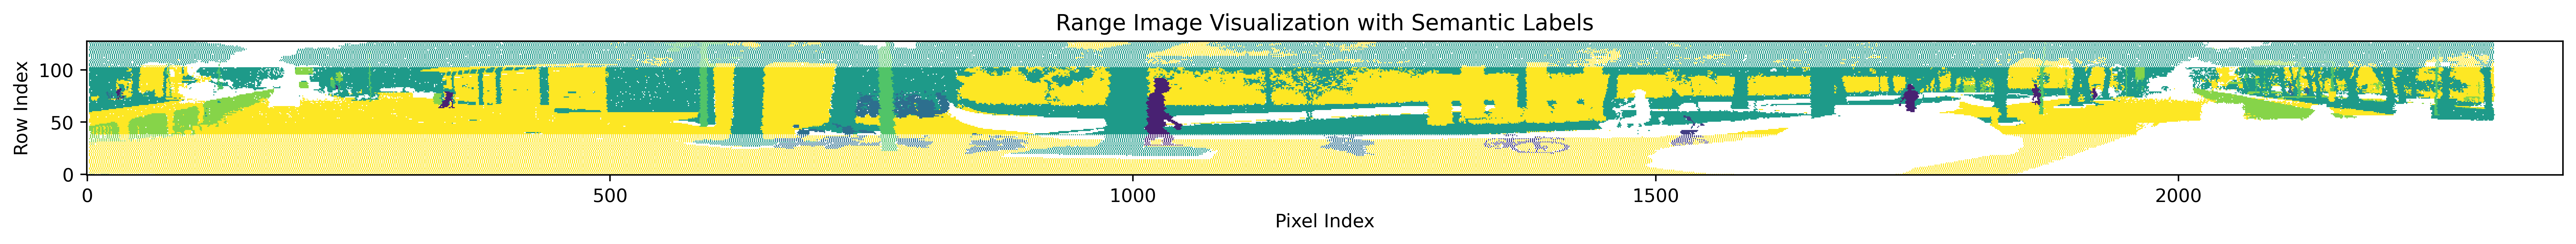

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 假设 range_image 的形状为 (128, 2368, 4)
# 其中前三列是 xyz，最后一列是范围为 1~12 的语义标签
# range_image = np.random.rand(128, 2368, 4)  # 示例数据

# (128, 2368, 4)
# np.save("points.npy", a)
range_image = np.load("./points.npy")  # 示例数据
print(range_image.shape)
# !!!!!!!!看实际情况！！！！！！！！在第一个维度（128 维度）上逆序
range_image = range_image[::-1, :, :]

# 提取语义标签(最后一列)
labels = range_image[:, :, 3].astype(int)  # 形状为 (128, 2368)

# 定义颜色映射
# 假设标签范围为 1~12，为每个标签分配一个颜色
cmap = plt.cm.viridis(np.linspace(0, 1, 12))  # 使用 viridis 颜色映射
cmap = np.vstack([[1, 1, 1, 1], cmap])  # label=0的颜色映射的开头添加白色（RGB: [1, 1, 1, 1]）
cmap = ListedColormap(cmap)  # 将颜色映射转换为 ListedColormap

# 可视化为二维图像
plt.figure(figsize=(24, 16), dpi=500)
# 使用 interpolation='none'：禁用插值，直接显示原始像素。（可选nearest）
plt.imshow(labels, cmap=cmap, interpolation='none', origin='lower')

# 添加颜色条
# cbar = plt.colorbar(ticks=range(1, 13))
# cbar.set_label('Semantic Label')

# 添加标题
plt.title('Range Image Visualization with Semantic Labels')
plt.xlabel('Pixel Index')
plt.ylabel('Row Index')

# 保存图像时设置更高的 DPI
plt.savefig("save/range_image.png", dpi=500)

plt.show()